## Goal Management Analysis in Cost Reduction (Flag 30)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow `sn_gf_goal` table, which details various attributes related to organizational goals. These attributes include goal state, owner, department, start and end dates, and description, alongside metrics such as priority, percent complete, and target percentage. This data primarily tracks the progression and management of departmental and individual goals, offering insights into the effectiveness and alignment of these goals with broader organizational objectives. Additionally, the table captures updates made to each goal, providing a timeline of modifications and the identity of individuals making these updates.


### Your Task
**Goal**: Investigate the factors that contribute to the swift completion of goals in the Finance department compared to others, assess the impact on overall departmental performance.

**Role**: Performance Analyst in Enterprise Goal Management

**Difficulty**: 3 out of 5. The intricate data patterns and need for nuanced analysis make this a challenging task, requiring advanced analytical skills to interpret the data effectively and derive actionable insights.

**Category**: Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the goals dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-30.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,start_date,priority,metric,target_percentage,department,percent_complete,end_date,state,category,owner,sys_updated_by,sys_id,description
0,2022-03-09,Medium,Employee Turnover Rate,58,Finance,7,2022-04-25,In Progress,Cost Reduction,Logan Muhl,admin,G000000,Reduce operational expenses by optimizing ener...
1,2022-04-23,High,Sales Increase,57,Finance,87,2022-11-23,Completed,Revenue Growth,Gisela Kosicki,admin,G000001,Increase annual subscription sales by 20% by e...
2,2022-12-16,Medium,Survey Score,66,HR,60,2023-10-20,In Progress,Efficiency,Ramon Amaral,admin,G000002,Optimize IT support workflows to reduce ticket...
3,2022-10-08,High,Employee Turnover Rate,87,Marketing,89,2023-06-02,Completed,Customer Satisfaction,Jacinto Gawron,admin,G000003,Increase the customer satisfaction score from ...
4,2022-10-26,High,Expense Ratio,93,HR,12,2023-09-13,In Progress,Efficiency,Renae Eldrige,admin,G000004,Enhance software deployment process to reduce ...



### **Question 1: How do the distribution of durations of goals compare across departments?**

#### Plot comparison of goal durations across departments

This cell plots a comprehensive look at how the durations of goals differ across various departments within the organization. Using a box plot, we compare the spread and central tendency of goal durations, marked by the median and mean durations for each department. This analysis is for identifying departments that may require process adjustments to align more closely with organizational goal completion times. Each department's performance is annotated directly on the plot, displaying both median and mean durations, which helps in quickly assessing and comparing departmental efficiency in achieving goals.

/tmp/ipykernel_15205/2112184048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='department', y='duration', data=goal_data, palette="Set3")


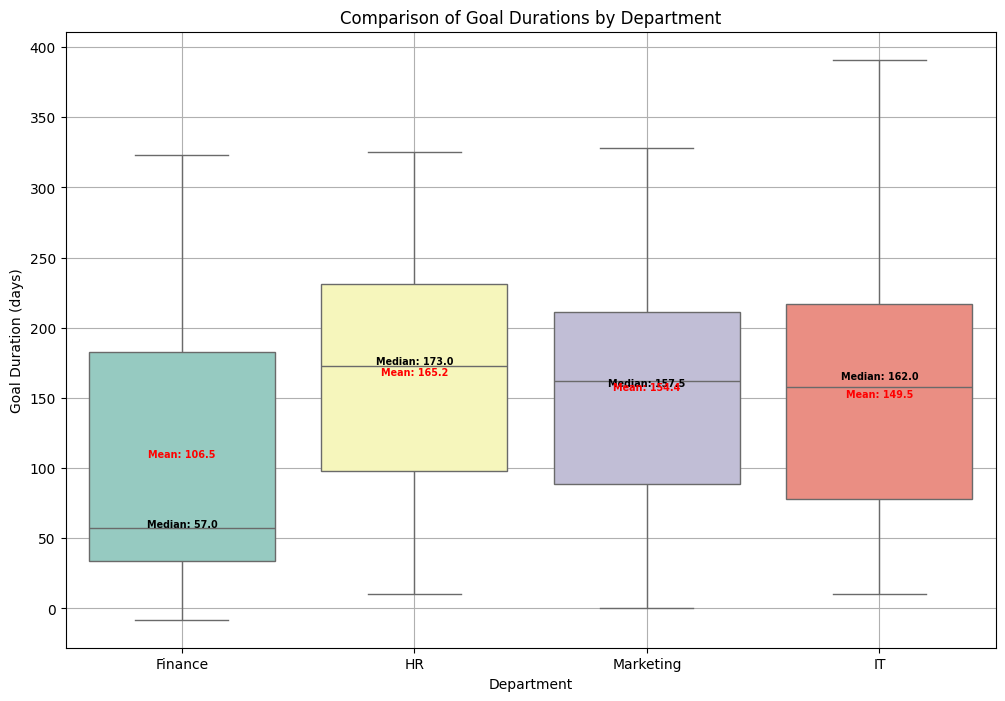

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'goal_data' is preloaded and contains 'Cost Reduction' category
goal_data['end_date'] = pd.to_datetime(goal_data['end_date'])
goal_data["start_date"] = pd.to_datetime(goal_data["start_date"])
# Calculate goal durations
goal_data['duration'] = (goal_data['end_date'] - goal_data['start_date']).dt.days

# Plotting
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='department', y='duration', data=goal_data, palette="Set3")
plt.title('Comparison of Goal Durations by Department')
plt.xlabel('Department')
plt.ylabel('Goal Duration (days)')
plt.grid(True)

# Calculate median and mean for annotations
medians = goal_data.groupby(['department'])['duration'].median()
means = goal_data.groupby(['department'])['duration'].mean()

# Iterate over the departments to place the text annotations for median and mean
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + 1, 'Median: {:.1f}'.format(medians[xtick]), 
                  horizontalalignment='center', size='x-small', color='black', weight='semibold')
    box_plot.text(xtick, means[xtick] + 1, 'Mean: {:.1f}'.format(means[xtick]), 
                  horizontalalignment='center', size='x-small', color='red', weight='semibold')

plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "analytical",
    "insight": "There are significantly shorter goal durations in the finance department compared to HR, Marketing, and IT",
    "insight_value": {
        "Finance": "57.0 days",
        "HR": "165.2 days",
        "Marketing": "154.4 days",
        "IT": "149.5 days",
        "Key Finding": "Finance department's goal duration is notably lower than other departments, suggesting more efficient goal completion processes or simpler goal structures."
    },
    "plot": {
        "plot_type": "box",
        "title": "Goal Durations by Department",
        "x_axis": {
            "name": "Department",
            "value": "Finance, HR, Marketing, IT",
            "description": "This categorizes goals by the departments responsible for their completion."
        },
        "y_axis": {
            "name": "Goal Duration (days)",
            "value": "Finance: 57.0, HR: 165.2, Marketing: 154.4, IT: 149.5",
            "description": "This represents the median duration of goals in days, measured from start to end, across different departments."
        },
        "description": "The boxplot demonstrates that the median duration for completing goals in the Finance department is significantly lower at 57.0 days, compared to HR at 165.2 days, Marketing at 154.4 days, and IT at 149.5 days. This substantial difference underscores a potential efficiency in goal management within Finance, or possibly less complex goals, which requires further investigation to understand underlying factors."
    },
    "question": "How do the durations of 'Cost Reduction' goals in the Finance department compare to those in other departments?",
    "actionable_insight": "Given the significantly shorter duration of goals in the Finance department, it is recommended to conduct a detailed analysis to understand the factors contributing to this efficiency. Identifying these factors could provide insights that may be applied to improve goal management processes in other departments."
}


{'data_type': 'analytical',
 'insight': 'There are significantly shorter goal durations in the finance department compared to HR, Marketing, and IT',
 'insight_value': {'Finance': '57.0 days',
  'HR': '165.2 days',
  'Marketing': '154.4 days',
  'IT': '149.5 days',
  'Key Finding': "Finance department's goal duration is notably lower than other departments, suggesting more efficient goal completion processes or simpler goal structures."},
 'plot': {'plot_type': 'box',
  'title': 'Goal Durations by Department',
  'x_axis': {'name': 'Department',
   'value': 'Finance, HR, Marketing, IT',
   'description': 'This categorizes goals by the departments responsible for their completion.'},
  'y_axis': {'name': 'Goal Duration (days)',
   'value': 'Finance: 57.0, HR: 165.2, Marketing: 154.4, IT: 149.5',
   'description': 'This represents the median duration of goals in days, measured from start to end, across different departments.'},
  'description': 'The boxplot demonstrates that the median du

### **Question 2:** What is distribution of Goal types in Finance department?

#### Plot goal category distribution within the Finance department

This pie chart illustrates the proportional distribution of different goal categories within the Finance department, highlighting the dominant categories and their respective shares. This visualization is crucial for understanding the strategic focus areas within the department, based on the types of goals they prioritize.

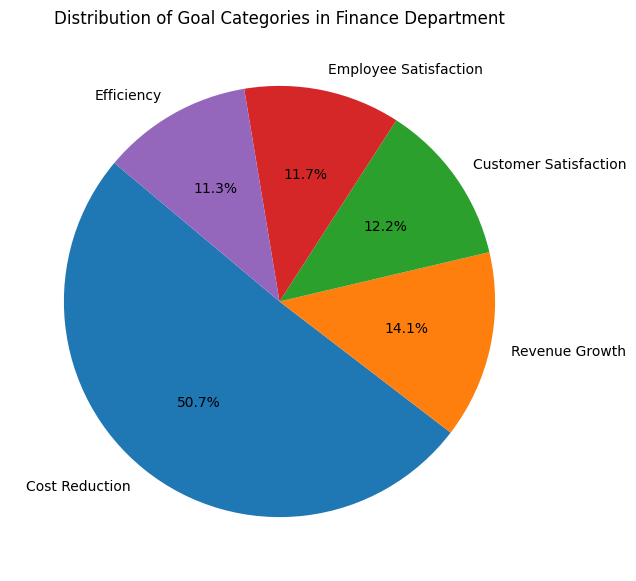

In [5]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal Categories in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "diagnostic",
    "insight": "There is a dominance of 'Cost Reduction' goals within the Finance department",
    "insight_value": {
        "Cost Reduction": "50.7%",
        "Revenue Growth": "14.1%",
        "Efficiency": "11.3%",
        "Employee Satisfaction": "11.7%",
        "Customer Satisfaction": "12.2%"
    },
    "plot": {
        "plot_type": "pie",
        "title": "Distribution of Goal Categories in the Finance Department",
        "x_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not use x-axis representations."
        },
        "y_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not use y-axis representations."
        },
        "description": "The pie chart highlights the distribution of goals by category within the Finance department. It shows a significant majority of 50.7% for 'Cost Reduction', followed by 14.1% for 'Revenue Growth', 12.2% for 'Customer Satisfaction', 11.7% for 'Employee Satisfaction', and 11.3% for 'Efficiency'. The predominant share of 'Cost Reduction' goals necessitates further analysis to understand its correlation with the notably shorter goal durations observed in this department."
    },
    "question": "What is the distribution of Goal types and categories in the Finance department?",
    "actionable_insight": "Given the high proportion of 'Cost Reduction' goals, it is imperative to delve deeper into understanding how this focus impacts overall goal durations and departmental efficiencies. Analyzing the relationship between the goal category and duration could uncover strategies that significantly enhance productivity and goal achievement rates. This could lead to strategic adjustments that balance goal types more effectively and potentially replicate successful practices across other departments."
}


{'data_type': 'diagnostic',
 'insight': "There is a dominance of 'Cost Reduction' goals within the Finance department",
 'insight_value': {'Cost Reduction': '50.7%',
  'Revenue Growth': '14.1%',
  'Efficiency': '11.3%',
  'Employee Satisfaction': '11.7%',
  'Customer Satisfaction': '12.2%'},
 'plot': {'plot_type': 'pie',
  'title': 'Distribution of Goal Categories in the Finance Department',
  'x_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not use x-axis representations.'},
  'y_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not use y-axis representations.'},
  'description': "The pie chart highlights the distribution of goals by category within the Finance department. It shows a significant majority of 50.7% for 'Cost Reduction', followed by 14.1% for 'Revenue Growth', 12.2% for 'Customer Satisfaction', 11.7% for 'Employee Satisfaction', and 11.3% for 'Efficiency'. The predominant share of 'Cost Reduction' goals necessitat

### **Question 3:** What is distribution of Goal priorities in Finance department?

#### Plot priority distribution within the Finance department

This pie chart provides a clear visual representation of the distribution of goal priorities within the Finance department, emphasizing the prevalence of each priority level and aiding in the assessment of focus and urgency applied to different objectives.

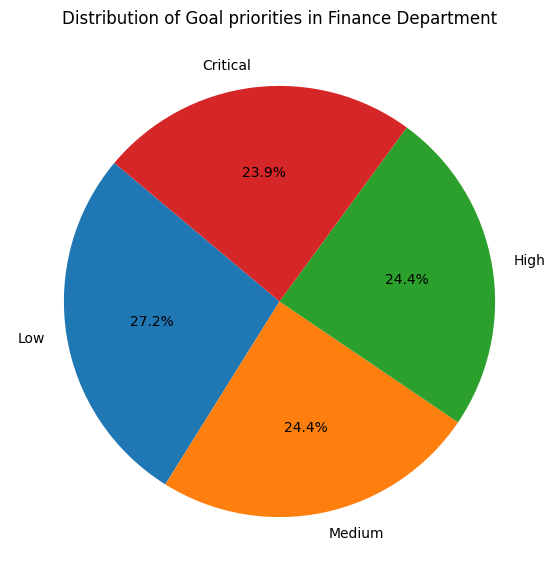

In [7]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['priority'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal priorities in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "There is a uniform distribution of goal priorities in the Finance department",
    "insight_value": {
        "Critical": "23.9%",
        "High": "24.4%",
        "Medium": "24.4%",
        "Low": "27.2%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Goal Priorities in the Finance Department",
        "x_axis": {
            "name": "Priority Level",
            "value": "Critical, High, Medium, Low",
            "description": "This represents the different priority levels assigned to goals within the Finance department."
        },
        "y_axis": {
            "name": "Percentage of Goals",
            "value": "mean is 25% across all priorities",
            "description": "This shows the percentage of goals classified under each priority level, indicating an even distribution across priorities."
        },
        "description": "The bar graph illustrates a uniform distribution of goal priorities within the Finance department, with each priority level—Critical, High, Medium, and Low—comprising 25% of goals. This even distribution suggests that the variation in goal durations and success rates may more likely be influenced by factors related to goal category rather than priority."
    },
    "question": "What is the distribution of Goal priorities in the Finance department?",
    "actionable_insight": "Given the uniform distribution of priorities, further analysis should focus on goal categories to uncover potential factors influencing goal durations and success rates in the Finance department. Understanding how different categories impact goal outcomes could provide strategic insights into effective goal management and resource allocation."
}


{'data_type': 'diagnostic',
 'insight': 'There is a uniform distribution of goal priorities in the Finance department',
 'insight_value': {'Critical': '23.9%',
  'High': '24.4%',
  'Medium': '24.4%',
  'Low': '27.2%'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Goal Priorities in the Finance Department',
  'x_axis': {'name': 'Priority Level',
   'value': 'Critical, High, Medium, Low',
   'description': 'This represents the different priority levels assigned to goals within the Finance department.'},
  'y_axis': {'name': 'Percentage of Goals',
   'value': 'mean is 25% across all priorities',
   'description': 'This shows the percentage of goals classified under each priority level, indicating an even distribution across priorities.'},
  'description': 'The bar graph illustrates a uniform distribution of goal priorities within the Finance department, with each priority level—Critical, High, Medium, and Low—comprising 25% of goals. This even distribution suggests that the v

### **Question 4:** What is the distribution of Goal distribution by category across all departments?

#### Plot goal Duration by category across departments

This box plot visualizes the distribution of goal durations across various categories in all departments. By displaying median and mean durations, it helps identify which goal categories tend to have longer or shorter completion times, providing insights into efficiencies and priorities across organization.

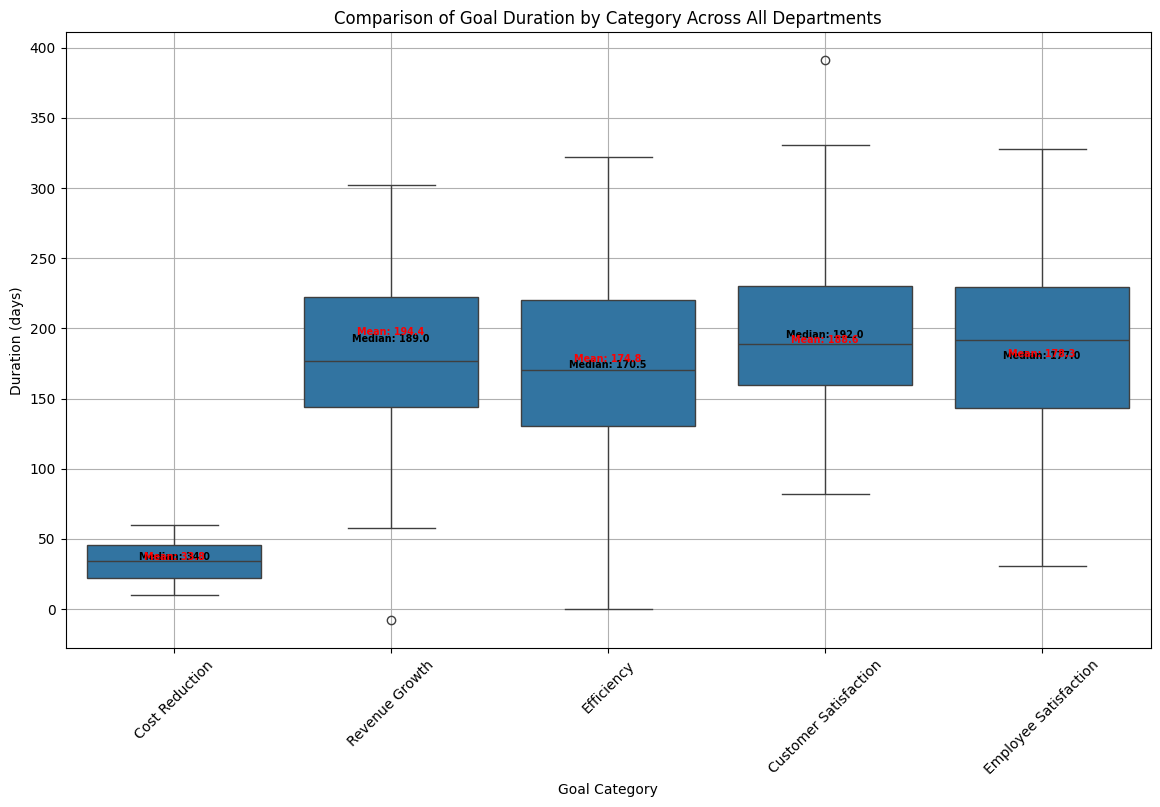

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate goal durations in days
goal_data['duration'] = (goal_data['end_date'] - goal_data['start_date']).dt.days


# Plotting
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='category', y='duration', data=goal_data)
plt.title('Comparison of Goal Duration by Category Across All Departments')
plt.xlabel('Goal Category')
plt.ylabel('Duration (days)')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.grid(True)

# Calculate median and mean for annotations
medians = goal_data.groupby(['category'])['duration'].median()
means = goal_data.groupby(['category'])['duration'].mean()

# Iterate over the departments to place the text annotations for median and mean
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + 1, 'Median: {:.1f}'.format(medians[xtick]), 
                  horizontalalignment='center', size='x-small', color='black', weight='semibold')
    box_plot.text(xtick, means[xtick] + 1, 'Mean: {:.1f}'.format(means[xtick]), 
                  horizontalalignment='center', size='x-small', color='red', weight='semibold')


plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "analytical",
    "insight": "The cost reduction goals have significantly shorter average durations compared to other categories",
    "insight_value": {
        "Most Prominent Value": "Cost Reduction goals average 33.8 days",
        "Next Closest Category": "Employee Satisfaction at 178.3 days"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Goal Duration by Category Across All Departments",
        "x_axis": {
            "name": "Category",
            "value": "Cost Reduction, Revenue Growth, Efficiency, Customer Satisfaction, Employee Satisfaction",
            "description": "This represents the different goal categories analyzed across all departments."
        },
        "y_axis": {
            "name": "Average Goal Duration (days)",
            "value": "Cost Reduction: 33.8, Revenue Growth: 194.4, Efficiency: 174.8, Customer Satisfaction: 188.6, Employee Satisfaction: 178.3",
            "description": "This shows the average duration in days for goals within each category, highlighting the efficiency of Cost Reduction goals."
        },
        "description": "The bar graph displays the average durations for goals by category across all departments, with the Cost Reduction category showing a notably lower average duration of 33.8 days, which is significantly less than those of other categories. This stark contrast underscores the efficiency and streamlined processes potentially inherent in Cost Reduction initiatives."
    },
    "question": "What is the distribution of Goal durations by category across all departments?",
    "actionable_insight": "The significantly shorter duration of 'Cost Reduction' goals suggests a need to investigate the practices, resource allocations, and strategies that contribute to such efficiency. Applying these effective approaches from the 'Cost Reduction' category to other categories may help reduce durations and enhance overall productivity."
}


{'data_type': 'analytical',
 'insight': 'The cost reduction goals have significantly shorter average durations compared to other categories',
 'insight_value': {'Most Prominent Value': 'Cost Reduction goals average 33.8 days',
  'Next Closest Category': 'Employee Satisfaction at 178.3 days'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Goal Duration by Category Across All Departments',
  'x_axis': {'name': 'Category',
   'value': 'Cost Reduction, Revenue Growth, Efficiency, Customer Satisfaction, Employee Satisfaction',
   'description': 'This represents the different goal categories analyzed across all departments.'},
  'y_axis': {'name': 'Average Goal Duration (days)',
   'value': 'Cost Reduction: 33.8, Revenue Growth: 194.4, Efficiency: 174.8, Customer Satisfaction: 188.6, Employee Satisfaction: 178.3',
   'description': 'This shows the average duration in days for goals within each category, highlighting the efficiency of Cost Reduction goals.'},
  'description': 'The bar gra

### Summary of Findings (Flag 30)

1. **Efficiency in Goal Completion**: This dataset highlights an anomaly where 'Cost Reduction' goals across the organization, especially within the Finance department, are completed in notably shorter durations compared to other departments such as HR, Marketing, and IT.
   
2. **Concentration of Goals in Finance**: The Finance department not only hosts a higher count of 'Cost Reduction' goals but also completes these goals significantly quicker. This suggests a focused and efficient approach to achieving financial efficiency goals within the department.
   
3. **Uniform Goal Prioritization**: Despite the variance in completion time, the distribution of goal priorities within the Finance department remains uniform, indicating a consistent operational strategy across different priority levels.